In [65]:
#Finding Heavy Traffic Indicators on I-94
#The aim is too analyze a dataset about the westbound traffic on the I-94 Interstate highway, and determine a few indicators of heavy traffic on I-94.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

metroTraffic = pd.read_csv('C:/Users/hp/Downloads/Metro_Interstate_Traffic_Volume.csv')
metroTraffic.head(5)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [67]:
#T check information about the dataset
metroTraffic.info

<bound method DataFrame.info of       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1

In [68]:
metroTraffic['traffic_volume'].describe()
#it can be seen that 25% of the time, 1193 cars passed, and another 25%,3380 cars passed. 

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

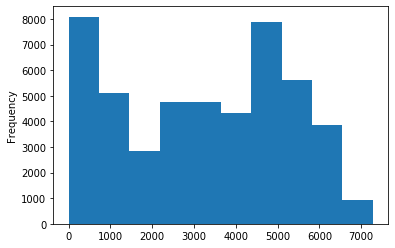

In [69]:
#To examine the distribution of traffic volume
metroTraffic['traffic_volume'].plot.hist()
plt.show()

In [70]:
#to transform dat_time column to datetime 
metroTraffic['date_time'] =  pd.to_datetime(metroTraffic['date_time'])
day =  metroTraffic.copy()[(metroTraffic['date_time'].dt.hour >= 7) & (metroTraffic['date_time'].dt.hour < 19)]
print(day.shape)

night = metroTraffic.copy()[(metroTraffic['date_time'].dt.hour >= 19) | (metroTraffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


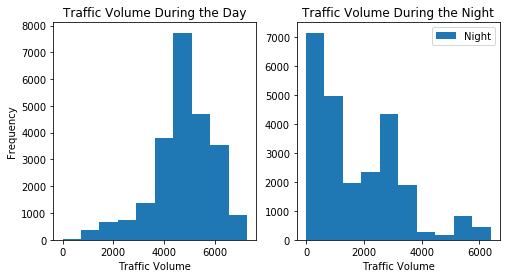

In [71]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'], label='Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume During the Day')
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'], label='Night')
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume During the Night')
plt.legend()
plt.show()

In [72]:
#the histograms are left skewed and right skewed respectively
#Traffic at night is light, and traffic in the day is heavy
#Now, to get the traffic volume for each momth
day['month'] = day['date_time'].dt.month
byMonth = day.groupby('month').mean()
byMonth['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

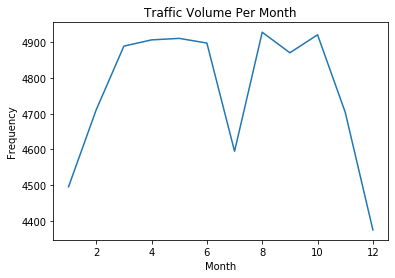

In [76]:
plt.plot(byMonth['traffic_volume'])
plt.title('Traffic Volume Per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#From the above, it is seen that traffic is heavier on business days


In [80]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

In [81]:
#To generate plots for traffic of the day
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >=5]
business_by_hour = business_day.groupby('hour').mean()
weekend_by_hour = weekend.groupby('hour').mean()
print(business_by_hour['traffic_volume'])
print(weekend_by_hour['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


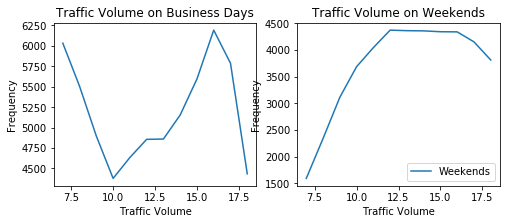

In [84]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(business_by_hour['traffic_volume'], label='Business Day')
plt.title("Traffic Volume on Business Days")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.subplot(1,2,2)
plt.plot(weekend_by_hour['traffic_volume'], label='Weekends')
plt.title("Traffic Volume on Weekends")
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.legend()
plt.show()

In [ ]:
#from the plots, the rush hours on business days are towards the end of the work week

In [85]:
metroTraffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [90]:
day['traffic_volume'].corr(metroTraffic['temp'])


0.12831656852303913

In [91]:
day['traffic_volume'].corr(metroTraffic['clouds_all'])

-0.032932348661639514

In [94]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
hour              0.172704
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

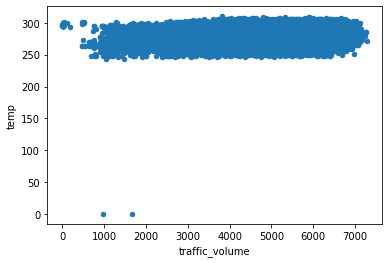

In [95]:
#The temp column has the highest correlation 
day.plot.scatter('traffic_volume', 'temp')
plt.show()

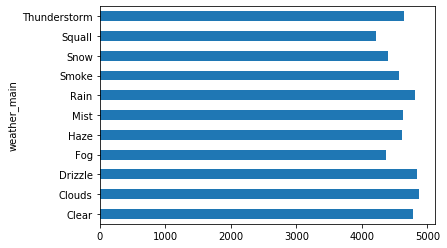

In [110]:
#tHE previous columns could not be used as traffic indicators. Hence, the need for new columns.
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

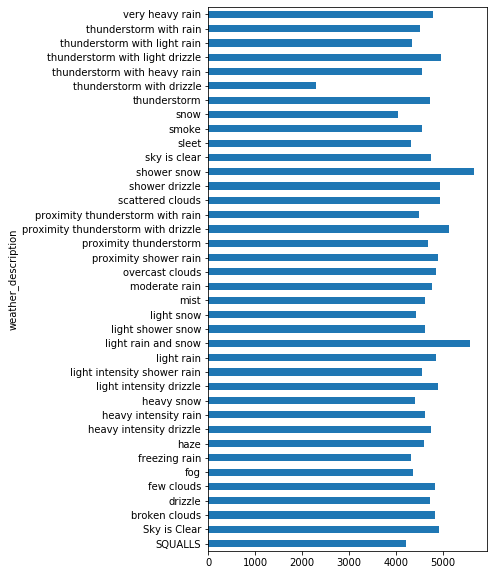

In [127]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()
